#03 머신러닝의 기초를 다집니다 - 수치 예측

##03-1 선형 회귀에 대해 알아보고 데이터를 준비합니다.

In [1]:
from sklearn.datasets import load_diabetes      #사이킷런의 datasets모듈에 있는 load_diabetes()함수를 import
diabetes = load_diabetes()

In [2]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
diabetes.target[:3]

array([151.,  75., 141.])

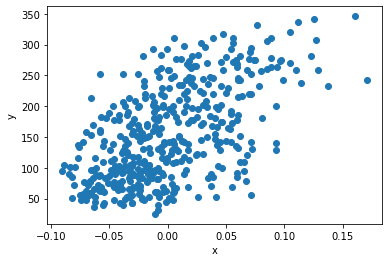

In [5]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
x = diabetes.data[:, 2]
y = diabetes.target

##03-2 경사 하강법으로 학습하는 방법을 알아봅니다

####**예측값으로 올바른 모델 찾기**

In [7]:
w = 1.0     # w와 b초기화 하기
b = 1.0

In [8]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [9]:
print(y[0])

151.0


In [10]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [11]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


####**변화율로 가중치 업데이트 하기**

In [12]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [13]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [14]:
b_new = b + 1
print(b_new)

2.0


####**오차 역전파로 가중치와 절편을 더 적절하게 업데이트합니다**

오차 역전파는 y hat과 y의 차이를 이용하여 w와 b를 업데이트 한다

#####**오차와 변화율을 곱하여 가중치 업데이트하기** **굵은 텍스트**

In [15]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [16]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


#####**전체 샘플을 반복하기**

In [17]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


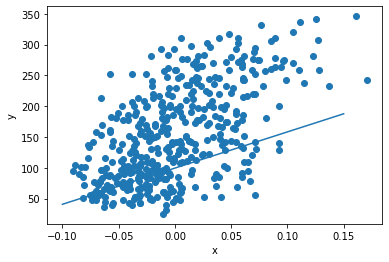

In [18]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#####**여러 에포크를 반복하기**

In [19]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


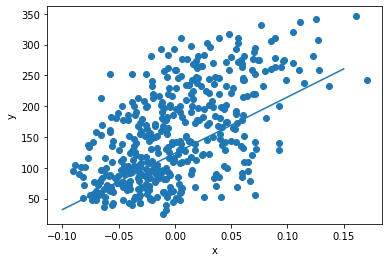

In [20]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#####**모델로 예측하기**

In [21]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


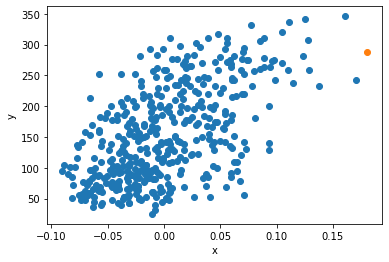

In [22]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##03-3 손실 함수와 경사 하강법의 관계를 알아봅니다

**가중치에 대하여 제곱 오차 미분하기**

In [23]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

**절편에 대하여 제곱 오차 미분하기**

In [24]:
err = y_i - y_hat
b = b + 1 * err

##03-4 선형 회귀를 위한 뉴런을 만듭니다

In [ ]:
class Neuron:
    
    def __init__(self):
        #초기화 작업을 수행
        #...
        #필요한 메서드를 추가
        #...


**1. __init__() 메서드 작성하기**

In [25]:
# 학습할 때 가중치 w와 절편 b는 시작값이 있어야 하므로 임의로 1.0로 지정

def __init(self):
    self.w = 1.0
    self.b = 1.0

**2. 정방향 계산 만들기**

In [26]:
# 정방향 계산이란 뉴런으로 도식화한 상태에서 y^을 구하는 방향을 보고 만든 용어이다.

def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

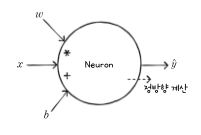

w, x, b가 뉴런의 왼쪽에서 오른쪽 방향으로 흘러 ŷ이 되고 이를 정방향 계산이라 한다.  
정방향 계산을 수한다고 하면 ŷ을 구한다고 생각하면 된다.  
ŷ = w * x + b

**3. 역방향 계산 만들기**

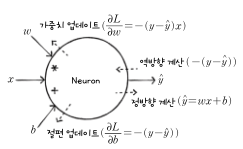

정방향 계산을 통해 얻어낸 ŷ과 y의 차이, 즉 오차가 뉴런의 오른쪽 방향에서 왼쪽 방향으로 흐르는 것처럼 보인다.
이를 역방향 계산이라 부르고 오차가 역전파(backpropagation)된다.

In [27]:
def backprop(self, x, err):
    w_grad = x * err        # 가중치에 대한 그레이디언트를 계산한다
    b_grad = 1 * err        # 절편에 대한 그레이디언트를 계산한다
    return w_grad, b_grad

**4. Neuron Class 만들기**

In [28]:
class Neuron:

    def __init__(self):
        self.w = 1.0    # 가중치를 초기화 한다
        self.b = 1.0    # 절편을 초기화 한다

    def forpass(self, x):
        y_hat = x * self.w + self.b     # 직선 방정식을 계산한다
        return y_hat_inc
    
    def backprop(slef, x, err):
        w_grad = x * err    # 가중치에 대한 그레이디언트를 계산한다
        b_grad = 1 * err    # 절편에 대한 그레이디언트를 계산한다
        return w_grad, b_grad

**5. 훈련을 위한 fit() 메서드 구현하기**

In [42]:
class Neuron:

    def __init__(self):
        self.w = 1.0    # 가중치를 초기화 한다
        self.b = 1.0    # 절편을 초기화 한다

    def forpass(self, x):
        y_hat = x * self.w + self.b     # 직선 방정식을 계산한다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그레이디언트를 계산한다
        b_grad = 1 * err    # 절편에 대한 그레이디언트를 계산한다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):                    # 에포크만큼 반복
            for x_i, y_i in zip(x, y):             # 모든 샘플에 대해 반복
                y_hat = self.forpass(x_i)          # 정방향 계산
                err = -(y_i - y_hat)               # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)    # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트

**6. 모델 훈련하기(학습시키기)**

In [43]:
neuron = Neuron()
neuron.fit(x, y)

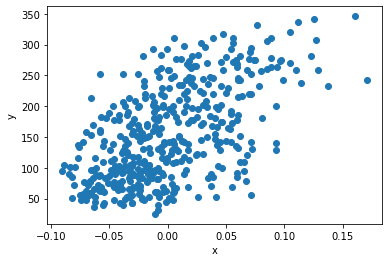

In [44]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt1 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()